## 1. Definitions
To start thinking concretely about machine learning, we need to have a definition for it. Let’s start
with an easy one. What is the definition of the word **machine** in our context?  There are a few possibilties: Your Grandma’s sewing machine? 
<img src="images/sewing_machine.jpg" style="width: 500px;">
A Pentium 2? A 3 to 1 pulley system? 
<img src="images/z_drag.jpg" style="width: 500px;">
These are all examples of machines (as understood in common English).  However, when you hear the phrase Machine Learning in the news, they’re talking about something different. Indeed, the phrase **machine** is a little bit misleading. For everything we do, it would (in principle) be possible to do the same calculations on pen and paper. Instead we’re looking for sets of instructions that ingest some sort of input and produce some sort of outputs, in such a way that once we’ve settled on those instructions, we don’t need to continue to be involved. This has a name that is frequently used in Computer Science: an algorithm. In fact, a better name for this course might actually be algorithmic learning.

So this is a course that deals in algorithms, and the mathematics that underlie those algorithms. But perhaps a more vacuous concept comes from the second word: learning. What does it mean to learn? Wikipedia defines it thusly: Learning is the process of acquiring new or modifying existing knowledge, behaviors, skills, values, or preferences. Do you guys like that definition? I think it’s stupid: modifying your behavior or skill isn’t learning, because you might be going backwards. For example, this lecture might be making you even more confused than you were to begin with, and you might be thinking about modifying your behavior in the direction of taking Liberal Studies 147: Underwater Basket Weaving instead (not to demean anyone, I did part of my undergrad at the Evergreen State College). In this case, you wouldn’t be getting better at the task you set out to do. And so there I’ve implicitly added a certain value judgement to this definition: learning needs to involve improvement and it needs to involve a fairly well defined subject over which you would like to learn. Improvement at what? Let’s consider that question with a little example.

## An example of irises
Imagine that one day you’re happily working away at your job as a research florist, and your boss frantically
says to you: "I just got a call from the board of regents, who say that they’re willing to fully fund the floristry
department under one condition: that we can identify this species of iris that they’ve just sent us." Fortunately, we know a few things.  First, we've been informed that the species is definitevely on of the following three species:  Iris setosa, Iris versicolor, or Iris virginica.  
<img src="images/iris_setosa.jpg" style="width: 400px;">

However, these irises look very similar, so we can’t tell just by looking. What should we do (with our department's financial solvency at stake)?  The reasonable answer is that you’re going to extract some data from
the iris, and compare it to data from a bunch of other irises with known species. And it just so happens that
we have access to a really nice database of flower metrics compiled by the very famous statistician [Ronald
Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher).  The dataset has four attributes: petal length, petal width, sepal length, and sepal width. (By the way [sepals](https://en.wikipedia.org/wiki/Sepal) are the leaves that surround the flower. Let’s take a look at what these features look like.  Because this dataset is so famous and useful as a benchmark, it's available in python's scikit-learn package.

In [5]:
from sklearn import datasets  # Import the sklearn datasets module
import matplotlib as mpl      # Plotting tools
mpl.rcParams['figure.figsize'] = [18,15]
mpl.rcParams['font.size'] = 18
import matplotlib.pyplot as plt

In [6]:
#Load the dataset
iris = datasets.load_iris()
X = iris.data 
Y = iris.target

Note that we've introduced some notation here.  *X* is an array of so-called **features**.  **features** are characteristic quantities that are observable and that we hope to use to make predictions.  Conversely *Y* is an array of **targets**, which are the things we hope to predict, in this case the iris species.  

Now, it is useful to plot these data and see if we can determine a pattern between inputs and outputs that we might use to make a prediction.  

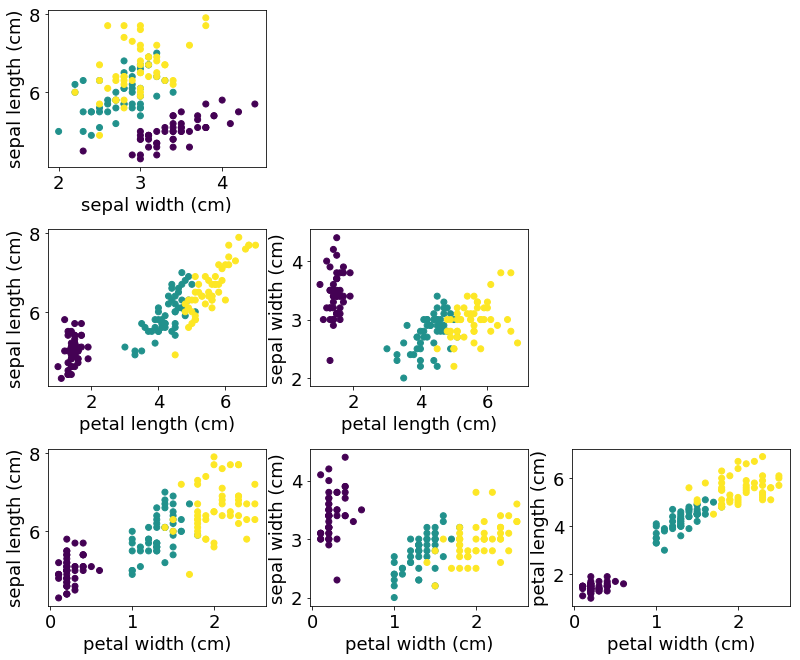

In [7]:
#Numeric class identifiers: 0 -> Setosa, 1-> Versicolor, 2-> Virginica
classes = [0,1,2] 

# 2D plots of all possible permutations of 2 features out of 4 produces 4 choose 2 = 3 plots
fig,axs = plt.subplots(nrows=4,ncols=4)
fig.subplots_adjust(hspace=0.4)
for i in range(4):
    for j in range(4):
        if i>j:
            axs[i,j].scatter(X[:,i],X[:,j],c=Y)
            axs[i,j].set_xlabel(iris['feature_names'][i])
            axs[i,j].set_ylabel(iris['feature_names'][j])
        else: # delete redundant plots
            fig.delaxes(axs[i,j])
plt.show()

It’s clear that there are patterns here, and probably enough of a pattern that by eye, we could classify a
new iris by comparing it to these existing data. For example, what if our test iris had a petal width of 0.3 cm and a petal length of 1.5.  Then the lower right plot would look like

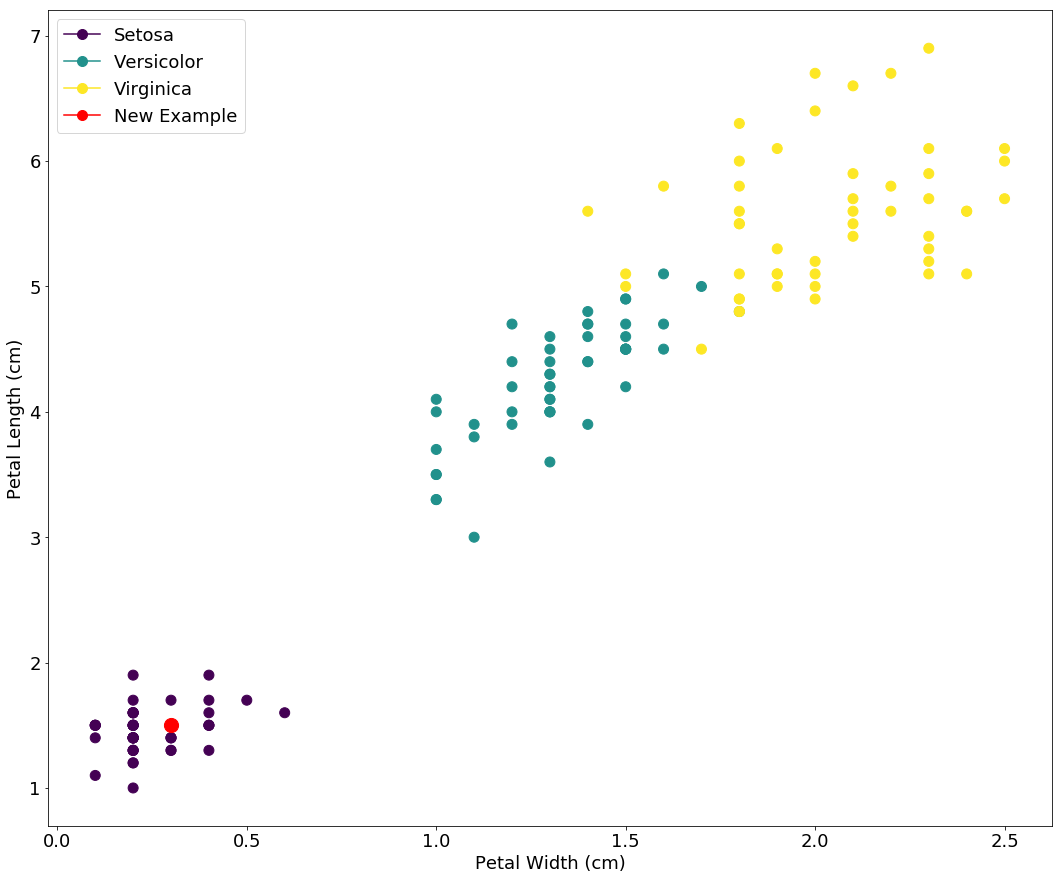

In [11]:
fig,axs = plt.subplots(nrows=1,ncols=1)
s = axs.scatter(X[:,3],X[:,2],c=Y,s=100)
colors = [[0.267004, 0.004874, 0.329415, 1.      ],
          [0.127568, 0.566949, 0.550556, 1.      ],
          [0.993248, 0.906157, 0.143936, 1.      ]]

new_example_plot = axs.scatter([0.3],[1.5],s=200,c='red')

names = ['Setosa','Versicolor','Virginica','Test Case']
legend_elements =  [plt.Line2D([0], [0], marker='o', color=color, label=name, markersize=10) for color,name in zip(colors,names)] + [plt.Line2D([0], [0], marker='o', color='red', label='New Example', markersize=10)]
axs.legend(handles=legend_elements,loc='upper left')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.show()

How would you classify it. Why?  Inutively it's pretty obvious.  

It’s worth thinking about what we’re trying to do in mathematical terms.  In order to take make predictions based on data, we need to develop a function ($F$ that maps from a set of inputs ($X$) to a set of outputs $Y$.
$$
F(X) \rightarrow Y
$$

The function $F$ is most often called a **model**, which is to say a distillation of the essential features
of the universe into a mathematically tractable object that helps us to reason. What are the inputs to the
model? The characteristics of the flower, which, once again, are called features or attributes. What
is the output? Again, the species of flower.  Thus is we have a good function $F$, then it accurately maps features to labels (or more generally to any response, as in the case of regression problems).  

So then what does it mean to learn, in this context?  Since we've couched our existing definitions in terms of prediction, it's natural to also define learning in terms of prediction.  Thus I posit the following natural definition for learning: adjusting our model $F$, so that we make better predictions.  Note that we've already done this in our mental model of iris classification (what that model actually *is* a large and interesting research field).  Prior to seeing the plot above, we would have done a terrible job at predicting the iris species.  Indeed our best strategy would have just been to guess.  However, now that we’ve seen some data, it was easy to make a prediction that would almost certainly be correct.  We’ve learned, updating our mental model to improve our predictive capability. 

Almost the entirety of machine learning is going to follow this template: Define a model (in this case I suspect our brains compare the difference between the new point and the old points and classify as the color which minimizes the difference), collect known inputs and outputs, and then tune the model until it provides the best predictive accuracy.  The richness of machine learning comes from figuring out sensible ways to define the model, followed by figuring out the best ways to turn the model's knobs. 

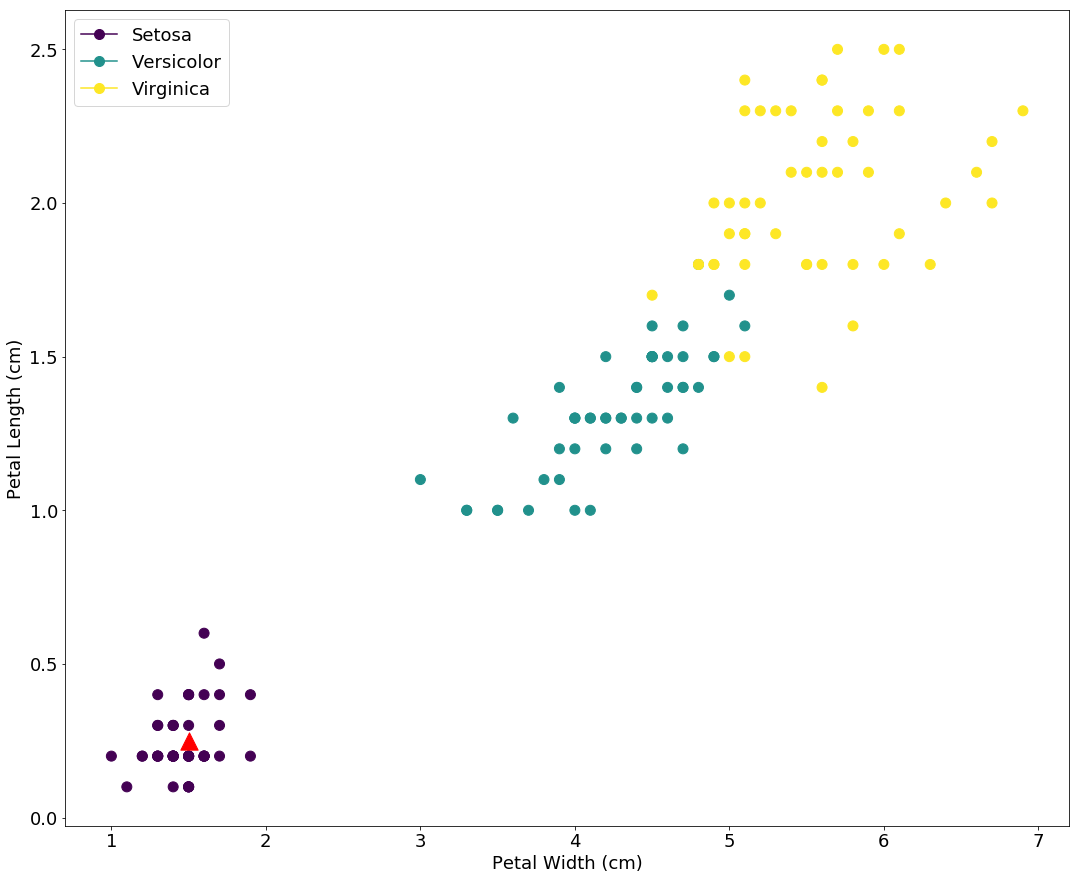

In [9]:
fig,axs = plt.subplots(nrows=1,ncols=1)
s = axs.scatter(X[:,2],X[:,3],c=Y,s=100)
colors = [[0.267004, 0.004874, 0.329415, 1.      ],
          [0.127568, 0.566949, 0.550556, 1.      ],
          [0.993248, 0.906157, 0.143936, 1.      ]]
names = ['Setosa','Versicolor','Virginica']
legend_elements =  [plt.Line2D([0], [0], marker='o', color=color, label=name, markersize=10) for color,name in zip(colors,names)]
axs.legend(handles=legend_elements,loc='upper left')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.scatter([1.5],[0.25],c='red',marker='^',s=300)
plt.show()

## Probability.
An interesting thing happens sometimes though.  Consider what would happen if the we were sent the iris example plotted in red below to classify.

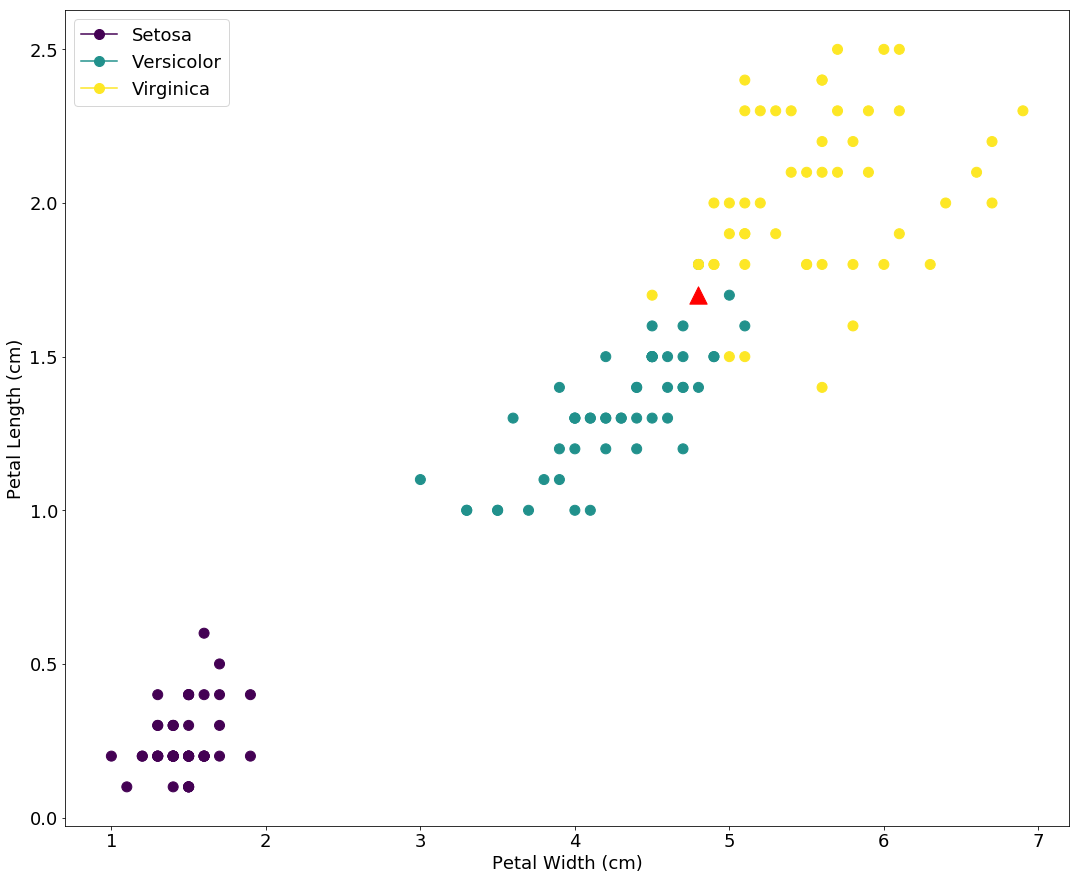

In [14]:
fig,axs = plt.subplots(nrows=1,ncols=1)
s = axs.scatter(X[:,2],X[:,3],c=Y,s=100)
colors = [[0.267004, 0.004874, 0.329415, 1.      ],
          [0.127568, 0.566949, 0.550556, 1.      ],
          [0.993248, 0.906157, 0.143936, 1.      ]]
names = ['Setosa','Versicolor','Virginica']
legend_elements =  [plt.Line2D([0], [0], marker='o', color=color, label=name, markersize=10) for color,name in zip(colors,names)]
axs.legend(handles=legend_elements,loc='upper left')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.scatter([4.8],[1.7],c='red',marker='^',s=300)
plt.show()

What does our mental model map this iris to? This one is a little bit tougher, but remember
that our departmental funding is on the line. What are you going to say? Are we going to select one at
random between these two choices? This is the reckless approach. Instead, we’re going to be courageous in
our embrace of uncertainty, and say that we don’t know exactly. It could be either Versicolor or Virginica, but
it’s definitely not Setosa. That’s something! So instead of reporting a predicted label, we’re going to report
a number between 0 and 1 for each of our potential target classes saying our relative belief that that’s the
right class. What is this number called? It’s called a probability, and in particular it’s probability according
to the Bayesian definition of the term. Because we live in an imperfect world that is full of randomness,
the language that we’re going to use to develop our models is the language of probability and statistics.
But before you start groaning about T-tests and p-values and stuff, we will use only the simplest stuff from
probability: 3 basic rules and a handful of distributions (see the next lecture).

## Other examples 
As one final point, it's useful to consider a few additional examples of the types of inputs and outputs we might be interested in developing predictive models between.  So let’s think quickly about how this framework of models, attributes, and targets apply to a couple other cases (spoiler: we’re going to think about all of these examples throughout the course). First, machine learning is often used to automate the reading of documents. As such, one thing we might want to do is to classify handwritten digits, like these ones.

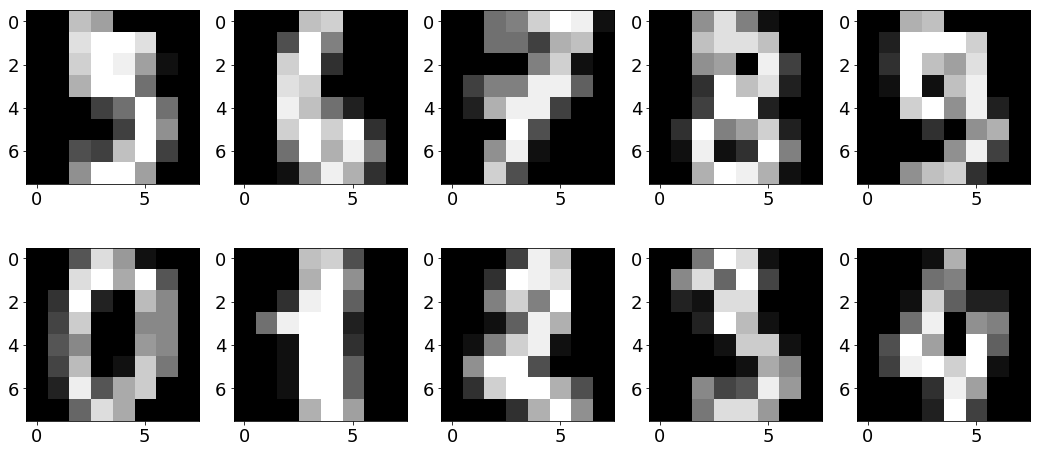

In [17]:
from sklearn.datasets import load_digits

X,Y = load_digits(return_X_y=True)
fig,axs = plt.subplots(nrows=2,ncols=5)
fig.set_size_inches(18,8)
for i in range(10):
    index_i = int(i<5)
    index_j = i%5
    axs[index_i,index_j].imshow(X[i].reshape(8,8),cmap=plt.cm.gray)
plt.show()
    


We haven’t talked about specific models yet, but what are the inputs and outputs that we might want to construct a map between?  In this case it's the values of the specific pixels and the digit itself.  This is easy for our brains to do, a testament to human visual processing abilities.  However, there's more than just pixel values here: there's also the relative arrangement of those values which provides information.  Making models that can account for the *correlations* between input features will be a major theme of this course.

Okay, so imagine that we have a great method for mapping from pixel values to digit class. Is that too different from the same task applied to the following dataset?  

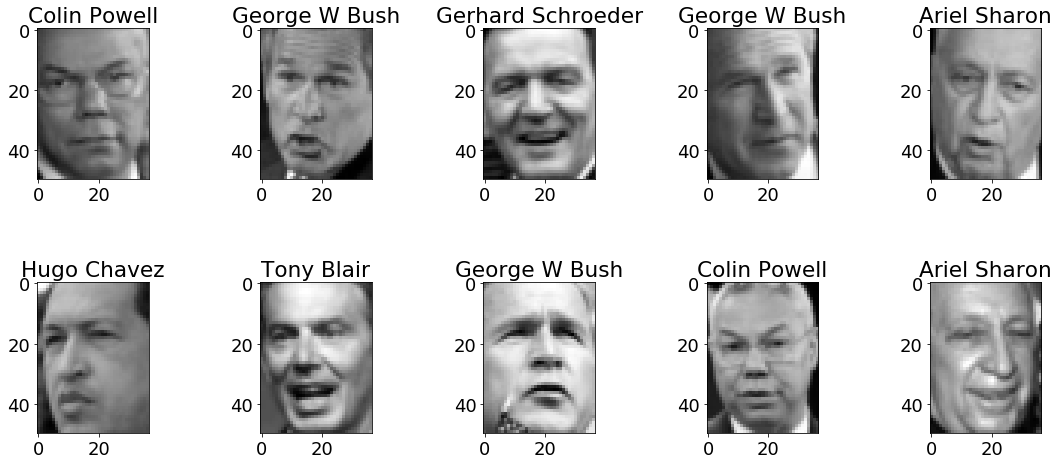

In [12]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

fig,axs = plt.subplots(nrows=2,ncols=5)
fig.subplots_adjust(wspace=1.0,hspace=0.4)
fig.set_size_inches(18,8)
for i in range(10):
    index_i = int(i<5)
    index_j = i%5
    axs[index_i,index_j].imshow(lfw_people.images[i],cmap=plt.cm.gray)
    axs[index_i,index_j].set_title(lfw_people.target_names[lfw_people.target[i]])
plt.show()

In this case, it's now names instead of digits that are the classes, but the fundamental problem is exactly the same.  We'll see that it's often possible (and delightfully surprising) to transfer machine learning models between different problems.  

Finally, think a bit about other cases in your life where you see maps being generated between inputs and outputs.  If you look closely it's ubiquitous: your Amazon, Facebook, and Google search histories are used to form a model for predicting your future purchases and thus targeting advertisements.  You interact with a model of natural language whenever you speak to an automated phone response system.  Indeed, examples of machine learning abound in the world today, and the trend is increasing rapidly.